In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
#pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/c8/73/36a13185c2acff44d601dc6107b5347e075561a49e15ddd4e69988414c3e/imbalanced_learn-0.6.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [180]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.metrics import confusion_matrix

In [4]:
names = ["Nearest Neighbors", "Gaussian Process",
          "Neural Net", "AdaBoost","Naive Bayes", "QDA"]

In [5]:
classifiers = [
    KNeighborsClassifier(3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=0.3, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

### Read in CSV

In [207]:
filename=r'all_features.csv'
data=pd.read_csv(filename)
data.shape[0]

68508

In [218]:
data.columns

Index(['encounter_id', 'HbA1c_High_CH', 'HbA1c_High_NoCH', 'HbA1c_Norm',
       'diag1_collapse_circulatory', 'diag1_collapse_digestive',
       'diag1_collapse_genit', 'diag1_collapse_injury',
       'diag1_collapse_muscul', 'diag1_collapse_neoplasms',
       'diag1_collapse_other', 'diag1_collapse_respiratory', 'age_bin_60+',
       'age_bin_<30', 'medical_specialty_short_ER_trauma',
       'medical_specialty_short_gp', 'medical_specialty_short_inter_med',
       'medical_specialty_short_missing', 'medical_specialty_short_other',
       'medical_specialty_short_surgery', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'discharge_other',
       'admission_source_collapse_other', 'admission_source_collapse_referral',
       'admission_source_collapse_transfer', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'number_outpatient_log1p', 'number_emergency_log1p',
       'number_inpatient_log1p', 'readmi

### Create hold out 10% data as validation set along wth test_train split

In [210]:
validation_index=list(data.sample(int(np.ceil(0.1*data.shape[0]))).index)
validation_data=data.loc[validation_index]
new_Idx = list(set(data.index) - set(validation_index))
data_X_y=data.loc[new_Idx]

In [214]:
# create a csv to load into other models 
validation_data.to_csv('validation.csv', index=True)

In [8]:
data_X_y.shape[0]+validation_data.shape[0] # should equal to 68508

68508

In [215]:
X_val= validation_data.iloc[:,1:validation_data.shape[1]-1]
y_val= validation_data['readmitted_yes']  
X_val_stand = StandardScaler().fit_transform(X_val)  # preprocess dataset by standarizing X data 

In [216]:
X= data_X_y.iloc[:,1:data_X_y.shape[1]-1]
y= data_X_y['readmitted_yes'] # do not make y a dataframe, x and y should both be np arrays
X_stand = StandardScaler().fit_transform(X)  # preprocess dataset by standarizing X data 

### Implement SMOTE: upsampling for imbalanced dataset for train test and validation 

In [217]:
print('Original dataset shape {}'.format(Counter(y)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X_stand, y)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56143, 1: 5514})
New dataset shape Counter({0: 56143, 1: 56143})


In [219]:
# run this cell if we want everything as training data 
#X_train=train_input_new
#y_train= train_output_new
after_upsampling_X = pd.DataFrame(X_val_stand, columns = list(X.columns))
after_upsampling_y = pd.DataFrame(y, columns = ['readmitted_yes'])
after_upsampling_X.to_csv('X_train_all', index=True)
after_upsampling_y.to_csv('y_train_all', index)

In [200]:
print('Original dataset shape {}'.format(Counter(y_val)))
#sm = SMOTE(random_state=20)
#X_val_stand, y_val = sm.fit_sample(X_val_stand, y_val)
#print('New dataset shape {}'.format(Counter(y_val)))

Original dataset shape Counter({0: 6242, 1: 609})


In [120]:
#train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.3, random_state=0)

In [184]:
#X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(train_val_input_new, train_val_output_new, test_size=0.20, random_state=0)

In [185]:
after_upsampling

HbA1c_High_CH  HbA1c_High_NoCH  HbA1c_Norm  diag1_collapse_circulatory  \
0          -0.245687        -0.184275   -0.320173                   -0.027025   
1          -0.245687        -0.184275   -0.320173                   -0.027025   
2          -0.245687        -0.184275   -0.320173                   -0.027025   
3          -0.245687        -0.184275   -0.320173                   -0.027025   
4          -0.245687        -0.184275    3.123316                   -0.027025   
...              ...              ...         ...                         ...   
12407      -0.245687        -0.184275   -0.320173                   -0.027025   
12408      -0.245687        -0.184275   -0.320173                   -0.027025   
12409      -0.245687        -0.184275   -0.320173                   -0.027025   
12410      -0.245687        -0.184275   -0.320173                   -0.027025   
12411      -0.245687        -0.184275   -0.320173                   -0.027025   

       diag1_collapse_digestive  diag1_collapse_genit  diag1_collapse_injury  \
0                     -0.317673             -0.224957              -0.262613   
1                      3.147894             -0.224957              -0.262613   
2                     -0.317673             -0.224957              -0.262613   
3                     -0.317673             -0.224957              -0.262613   
4                     -0.317673             -0.224957              -0.262613   
...                         ...                   ...                    ...   
12407                 -0.317673             -0.224957              -0.262613   
12408                 -0.317673             -0.224957              -0.262613   
12409                 -0.317673             -0.224957              -0.262613   
12410                 -0.317673             -0.224957               3.807887   
12411                 -0.317673             -0.224957              -0.262613   

       diag1_collapse_muscul  diag1_collapse_neoplasms  diag1_collapse_other  \
0                  -0.252953                 -0.207193              1.051077   
1                  -0.252953                 -0.207193             -0.951405   
2                  -0.252953                  4.826420             -0.951405   
3                  -0.252953                 -0.207193             -0.951405   
4                  -0.252953                 -0.207193              1.051077   
...                      ...                       ...                   ...   
12407               3.953308                 -0.207193             -0.951405   
12408              -0.252953                 -0.207193              1.051077   
12409              -0.252953                 -0.207193             -0.951405   
12410              -0.252953                 -0.207193             -0.951405   
12411              -0.252953                 -0.207193              1.051077   

       ...  admission_source_collapse_referral  \
0      ...                           -0.700691   
1      ...                           -0.700691   
2      ...                            1.427162   
3      ...                            1.427162   
4      ...                            1.427162   
...    ...                                 ...   
12407  ...                            1.427162   
12408  ...                           -0.585253   
12409  ...                            1.305463   
12410  ...                           -0.700691   
12411  ...                           -0.700691   

       admission_source_collapse_transfer  time_in_hospital  \
0                               -0.251644         -0.100031   
1                               -0.251644         -1.117322   
2                               -0.251644         -0.439128   
3                               -0.251644          0.578162   
4                               -0.251644         -1.117322   
...                                   ...               ...   
12407                           -0.251644         -0.899801   
12408  

In [186]:
X

HbA1c_High_CH  HbA1c_High_NoCH  HbA1c_Norm  diag1_collapse_circulatory  \
0                  0                0           0                           0   
1                  0                0           0                           0   
2                  0                0           0                           0   
3                  0                0           0                           0   
4                  0                0           0                           0   
...              ...              ...         ...                         ...   
68503              0                0           1                           0   
68504              1                0           0                           0   
68505              0                0           0                           0   
68506              0                0           0                           0   
68507              0                0           0                           0   

       diag1_collapse_digestive  diag1_collapse_genit  diag1_collapse_injury  \
0                             0                     0                      0   
1                             0                     0                      0   
2                             0                     0                      0   
3                             0                     0                      0   
4                             0                     0                      0   
...                         ...                   ...                    ...   
68503                         1                     0                      0   
68504                         0                     1                      0   
68505                         0                     0                      1   
68506                         0                     0                      0   
68507                         1                     0                      0   

       diag1_collapse_muscul  diag1_collapse_neoplasms  diag1_collapse_other  \
0                          0                         0                     0   
1                          0                         0                     1   
2                          0                         0                     1   
3                          0                         0                     1   
4                          0                         1                     0   
...                      ...                       ...                   ...   
68503                      0                         0                     0   
68504                      0                         0                     0   
68505                      0                         0                     0   
68506                      0                         0                     1   
68507                      0                         0                     0   

       ...  admission_source_collapse_referral  \
0      ...                                   1   
1      ...                                   0   
2      ...                                   0   
3      ...                                   0   
4      ...                                   0   
...    ...                                 ...   
68503  ...                                   0   
68504  ...                                   0   
68505  ...                                   0   
68506  ...                                   0   
68507  ...                                   0   

       admission_source_collapse_transfer  time_in_hospital  \
0                                       0                 1   
1                                       0                 3   
2                                       0                 2   
3                                       0                 2   
4                                       0                 1   
...                                   ...               ...   
68503                                   0                 9   
68504  

### Tree Models: 

Fit with decision model with max_depth = 28, criterion= entropy, min

Fit with 10 fold cross validation grid search 

#### Decision tree without cross validation: 

In [112]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [168]:
dtree_pred = dtree.predict(X_val_stand)  # predict on data the model has never seen before 
confusion_matrix(y_val, dtree_pred)

array([[  83, 6123],
       [  13, 6193]], dtype=int64)

In [169]:
#dtree_probs=dtree.predict_proba(X_test)[:,1]
dtree_probs_val= dtree.predict_proba(X_val_stand)[:,1]

In [170]:
# Calculate roc auc
#roc_value = roc_auc_score(y_test, dtree_probs)
roc_value_val= roc_auc_score(y_val, dtree_probs_val)

In [171]:
roc_value_val

0.5060410335490827

In [114]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_val, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_val, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_val, dtree_pred)))

Accuracy is 0.10
Precision is 0.09
Recall is 0.98


#### Decision Tree with grid search cross_validation 

In [69]:
grid_para_tree =  {'max_depth': range(1, 31),
    'criterion': ['gini', 'entropy']}


dtree.set_params(random_state=0)
grid_search_tree = ms.GridSearchCV(dtree, grid_para_tree, scoring='accuracy', cv=10, n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=28,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31)},
             p

In [167]:
print('The best score is %.4f' %grid_search_tree.best_score_)
print('The training score is %.4f' %(grid_search_tree.best_estimator_.score(X_train, y_train)))
print('The validation score is %.4f' %(grid_search_tree.best_estimator_.score(X_val_stand, y_val)))

The best score is 0.8996
The training score is 0.9618
The validation score is 0.5037


In [133]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
rm_prd = rm.predict(X_test)
confusion_matrix(y_test, rm_prd)

array([[16102,   748],
       [ 1993, 14849]], dtype=int64)

In [135]:
np.unique(rm_prd, return_counts=True)
tn,fp,fn,tp=confusion_matrix(y_test, rm_prd).ravel()
print(tn, fp, fn, tp)

16102 748 1993 14849


In [136]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

Accuracy is 0.92
Precision is 0.95
Recall is 0.88


In [166]:
rm_prd_validation = rm.predict(X_val_stand)
print("Validation Accuracy is {0:.2f}".format(accuracy_score(y_val, rm_prd_validation)))

Validation Accuracy is 0.52


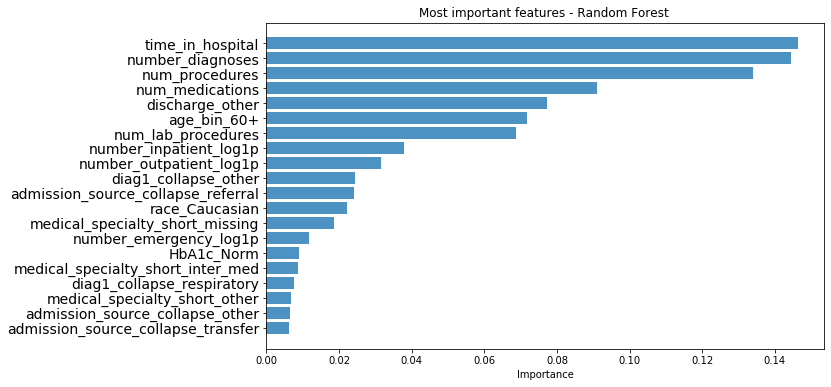

In [132]:
# Create list of top most features based on importance
feature_names = X.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

### Multilayer Perceptron 

Here's a nonlinear model with just one hidden layer 

In [20]:
clf=MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes= (1500,), max_iter=1000, warm_start=False)

In [21]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1500,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [194]:
multi_layer_perceptron_probs_val= clf.predict_proba(X_val_stand )[:,1]
auc_prob= roc_auc_score(y_val, multi_layer_perceptron_probs_val)
avg_precision= average_precision_score(y_val, multi_layer_perceptron_probs_val)

In [195]:
auc_prob

0.9156142851355482

In [196]:
avg_precision

0.6443825458988964

In [155]:
multi_layer_perceptron_probs_val[0:50]

array([1.26130866e-02, 3.09226419e-06, 2.49972413e-04, 6.32356267e-02,
       1.17771034e-01, 9.71612792e-01, 6.94225632e-04, 1.16503703e-03,
       3.88815080e-02, 1.09567600e-05, 3.13228687e-01, 3.42176519e-03,
       8.75321495e-08, 9.29925629e-03, 6.46815083e-06, 4.54594518e-01,
       9.27526800e-01, 5.37631079e-01, 3.46062509e-03, 7.84144399e-03,
       5.86314444e-01, 1.86412528e-01, 4.83078070e-02, 1.82930905e-01,
       1.38251205e-03, 4.58846716e-04, 5.35404361e-02, 4.81947125e-01,
       5.11422116e-01, 1.89574541e-01, 2.11446266e-03, 6.10056289e-02,
       2.81537098e-02, 5.78275541e-01, 1.79869691e-02, 4.13363548e-04,
       2.76651081e-10, 9.97912126e-01, 1.77129742e-02, 1.22589475e-02,
       6.63328954e-01, 5.23782712e-02, 3.01964380e-06, 3.05849284e-08,
       1.91307654e-01, 3.35124163e-03, 4.71461631e-05, 1.01355359e-03,
       7.27414221e-01, 4.16863610e-01])

In [198]:
clf.score(X_test, y_test)

0.9045767541256085

In [197]:
clf.score(X_val_stand, y_val)

0.9038096628229455

In [202]:
multi_perceptron_pred = clf.predict(X_val_stand)
confusion_matrix(y_val, multi_perceptron_pred)

array([[5691,  551],
       [ 108,  501]], dtype=int64)

In [203]:
tn, fp, fn, tp = confusion_matrix(y_val, multi_perceptron_pred).ravel()
(tn, fp, fn, tp)

(5691, 551, 108, 501)

In [204]:
specificity= tn/(tn+fp)
specificity

0.9117270105735341

In [205]:
sensitivity= tp/(tp+fn)
sensitivity

0.8226600985221675

In [206]:
precision=tp/(tp+fp)
precision

0.4762357414448669

In [175]:
fpr, tpr, thresholds = roc_curve(y_val, multi_perceptron_pred, pos_label=1)
auc(fpr, tpr)

0.7392845633258137

In [176]:
fpr

array([0.        , 0.12085079, 1.        ])

In [138]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)